# Imports

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Leitura dos dados

Os dados das tracks serão utilizados somente na lingua portuguesa

In [2]:
def get_data(dir= 'data', split= 'train', track= 'a', language= 'ptbr'):
    
    archive = language + '.csv' if split == 'train' else language + '_' + track + '.csv'

    path = f'{dir}/{split}/track_{track}/{archive}'
    
    return pd.read_csv(path)

In [4]:
track_a = get_data(track= 'a')
track_b = get_data(track= 'b')

In [7]:
track_a.head()

,id,text,Anger,Disgust,Fear,Joy,Sadness,Surprise
0,ptbr_train_track_a_00001,"minha vó me disse que era frango e eu comi, ti...",0,0,0,0,1,0
1,ptbr_train_track_a_00002,Está e a nossa deputada Benedita linda guerrei...,0,0,0,1,0,0
2,ptbr_train_track_a_00003,só falta as roupas kkkkkkkkkkk,0,0,0,1,0,0
3,ptbr_train_track_a_00004,Eu tmb. Comecei a sair de casa agora (fui pela...,0,0,0,0,1,0
4,ptbr_train_track_a_00005,Peço a Deus que nossos dirigentes tenham realm...,0,0,0,0,0,0


In [8]:
track_b.head()

,id,text,Anger,Disgust,Fear,Joy,Sadness,Surprise
0,ptbr_train_track_b_00001,Essa é a democracia e liberdade que a e seu p...,1,0,0,0,0,0
1,ptbr_train_track_b_00002,fiz isso! vou ficar prestando atenção se o che...,0,0,0,0,0,0
2,ptbr_train_track_b_00003,anao meu irmao ta em casa kk lixo,1,0,0,0,1,0
3,ptbr_train_track_b_00004,"Mas... a pandemia vem pra ficar, meu chapa. At...",0,0,2,0,0,0
4,ptbr_train_track_b_00005,Não entendi o post. Está enaltecendo a invasão...,2,1,0,0,0,0


# Análise dos dados

A primeira pergunta que surge é: Temos os mesmos textos para as diferentes tracks?

In [ ]:
if set(track_a['text']) == set(track_b['text']):
    print("Tracks com textos iguais.")
else:
    print("Tracks com textos diferentes.")

Tracks com textos iguais.


Temos então os mesmos textos de treino para as tracks, podemos então enxergar o dataset da track B como o exato mesmo dataset da track A, porém com intensidade atribuida as emoções

Pergunta: Quantas ocorrências de cada emoção temos no dataset?

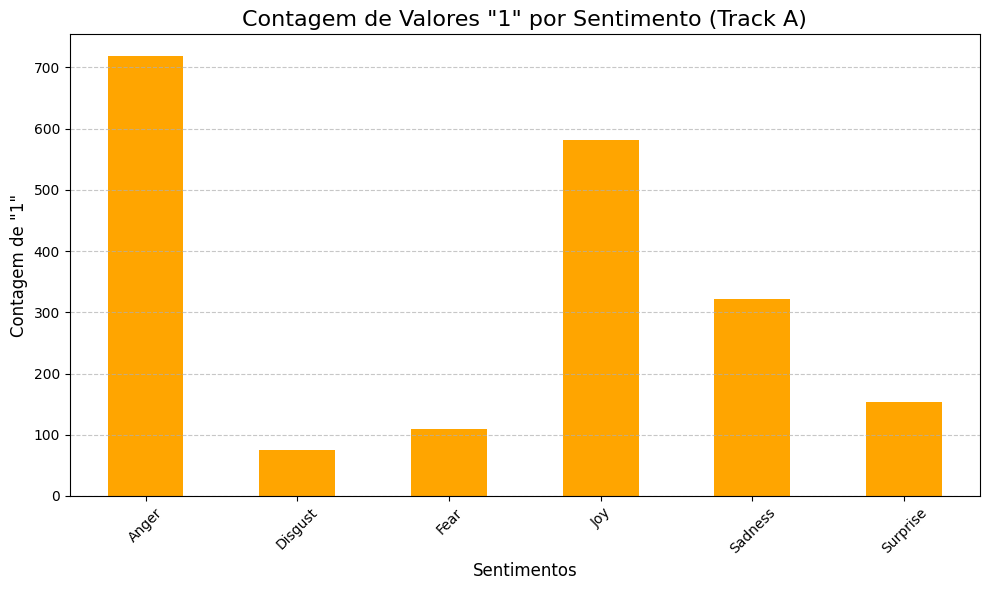

In [24]:
count_ones = (track_a.drop(columns=['id', 'text']) == 1).sum()

plt.figure(figsize=(10, 6))
count_ones.plot(kind='bar', color='orange')
plt.title('Contagem de Valores "1" por Sentimento (Track A)', fontsize=16)
plt.ylabel('Contagem de "1"', fontsize=12)
plt.xlabel('Sentimentos', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Pergunta: Temos sentimentos mais intensos que os outros?

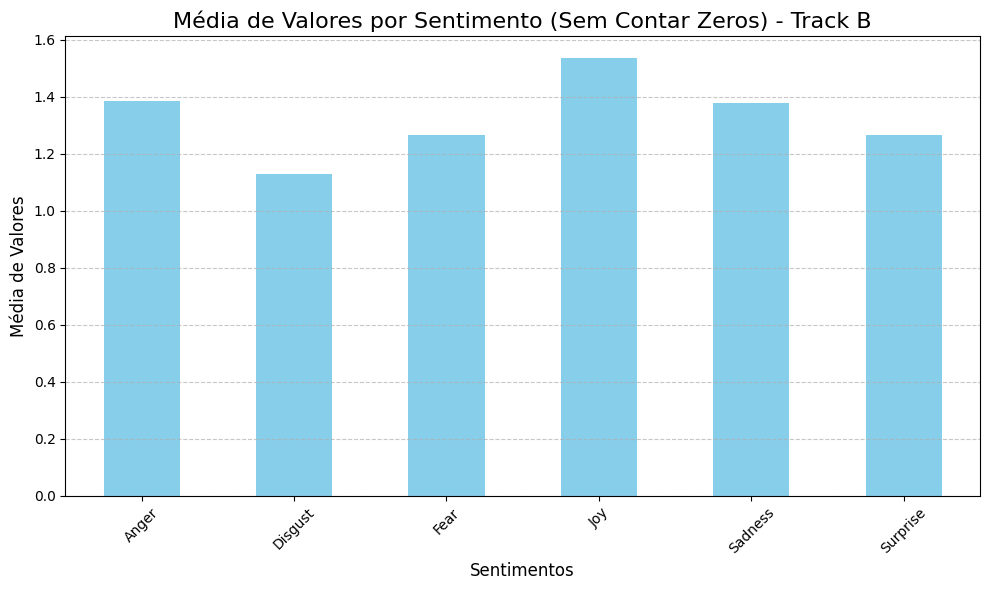

In [ ]:
track_b_feelings = track_b.drop(columns=['id', 'text'])

mean_non_zero = track_b_feelings[track_b_feelings != 0].mean()

plt.figure(figsize=(10, 6))
mean_non_zero.plot(kind='bar', color='skyblue')
plt.title('Média de Valores por Sentimento (Sem Contar Zeros) - Track B', fontsize=16)
plt.ylabel('Média de Valores', fontsize=12)
plt.xlabel('Sentimentos', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Por outro lado, temos uma média de intensidade do sentimento próxima para as classes

Pergunta: 